In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-segmentation/bank_transactions.csv


## 1. Load the Dataset and Required Libraries

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/bank-customer-segmentation/bank_transactions.csv')



In [4]:
# Display the first few rows
print(df.head())

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


## 2. Explore the Data
* Check for missing values, data types, and summary statistics.

In [5]:
# Check for missing values
print(df.isnull().sum())



TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [7]:
# Summary statistics
print(df.describe())


       CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06


In [6]:
# Check data types of columns
print(df.dtypes)

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


In [8]:
import pandas as pd

# Assuming df is your DataFrame

# Check for missing values
missing_values = df.isnull().sum()

# Sort missing values in descending order
sorted_missing_values = missing_values.sort_values(ascending=False)

print(sorted_missing_values)

CustomerDOB                3397
CustAccountBalance         2369
CustGender                 1100
CustLocation                151
TransactionID                 0
CustomerID                    0
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [9]:
# Summary statistics
print(df.describe())

       CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06


In [10]:
# Check data types of columns
print(df.dtypes)

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


## 3. Data Preprocessing
* Handle missing values if any.
* Drop irrelevant columns (such as customer ID).
* Encode categorical variables if needed.
* Standardize numerical variables for clustering.

In [11]:
# Drop 'Customer_ID' if present 
if 'Customer_ID' in df.columns: 
    df.drop('Customer_ID', axis=1, inplace=True)

# Separate numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Fill missing values with median
numeric_df.fillna(numeric_df.median(), inplace=True)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

# Check the shape of the scaled dataset
print(scaled_features.shape)



(1048567, 3)


## 4. Principal Component Analysis (PCA) - Optional
* PCA helps reduce dimensionality while retaining important features. It's useful if the dataset has many features.

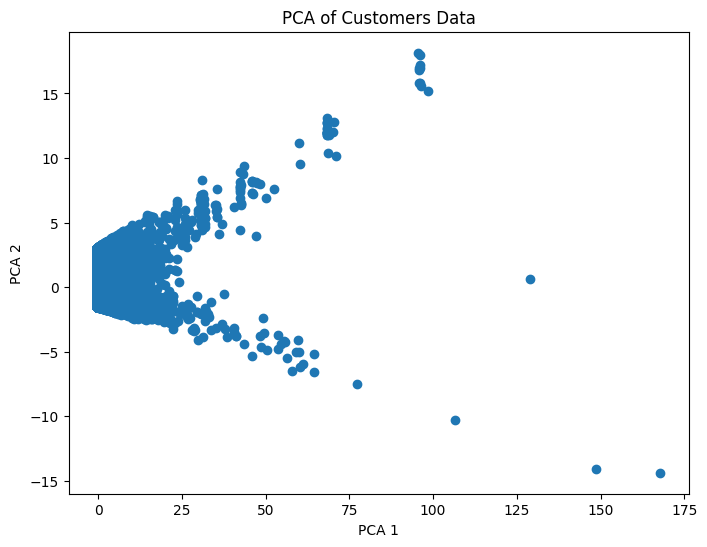

In [12]:
# Applying PCA to reduce dimensions for better visualization (optional)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plotting the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.title('PCA of Customers Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## 5. Clustering using K-Means
* Now, we'll use K-Means to identify customer segments. First, determine the optimal number of clusters using the Elbow Method.

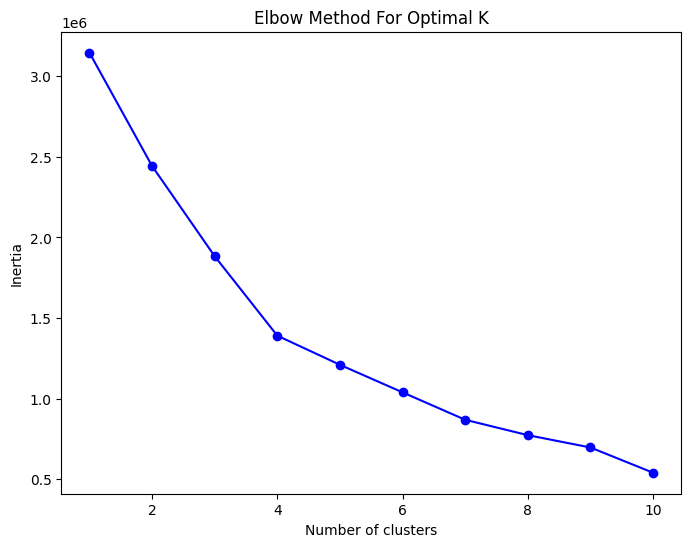

In [13]:

# Elbow Method to determine optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



## 6. Apply K-Means Clustering
- Once you determine the optimal number of clusters (e.g., 4), fit the K-Means model to the dataset and assign clusters to each customer.

In [14]:

# Fit K-Means with the chosen number of clusters (replace 4 with your chosen number)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# View the number of customers in each cluster
print(df['Cluster'].value_counts())



Cluster
3    631924
1    412102
0      4368
2       173
Name: count, dtype: int64


## 7. Visualize the Clusters
* Use PCA for a 2D visualization of the clusters.

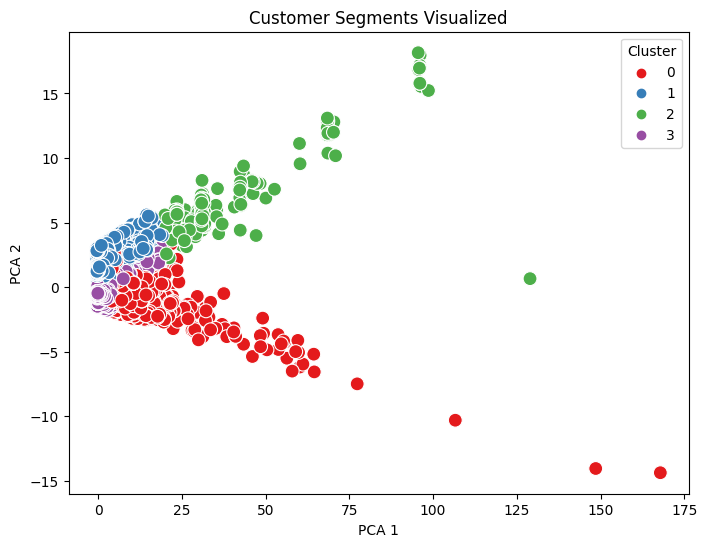

In [15]:
# Plotting clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments Visualized')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## 8. Analyze Customer Segments
* You can analyze each cluster by looking at the means of various features per cluster to understand the unique characteristics of each segment.

In [16]:
# Analyze the characteristics of each cluster (numeric columns)
numeric_summary = df.groupby('Cluster')[df.select_dtypes(include=['int64', 'float64']).columns].mean()
print(numeric_summary)

# Analyze the characteristics of each cluster (categorical columns)
categorical_summary = df.groupby('Cluster')[df.select_dtypes(include=['object']).columns].describe()
print(categorical_summary)



         CustAccountBalance  TransactionTime  TransactionAmount (INR)
Cluster                                                              
0              4.896860e+05    156450.637134             71328.089959
1              1.071335e+05    105096.223979              1199.696531
2              4.820054e+07    141842.150289             12386.053815
3              1.050220e+05    191001.639855              1333.537748
        TransactionID                     CustomerID                         \
                count  unique    top freq      count  unique       top freq   
Cluster                                                                       
0                4368    4368   T194    1       4368    4356  C4325361    2   
1              412102  412102     T1    1     412102  384315  C7537344    5   
2                 173     173  T5872    1        173     172  C2014414    2   
3              631924  631924     T5    1     631924  569199  C5418253    6   

        CustomerDOB       

## 9. Save the Results
* Finally, save the results (customer data with cluster labels) to a CSV file for further analysis or marketing strategies

In [17]:
# Save the customer segmentation results to a new CSV file
import os

# Specify the file path and name
file_path = 'customer_segments.csv'

# Check if the file already exists
if os.path.exists(file_path):
    overwrite = input("File already exists. Do you want to overwrite? (y/n): ")
    if overwrite.lower() != 'y':
        print("Operation cancelled.")
        exit()

# Save the dataframe to CSV
try:
    df.to_csv(file_path, index=False)
    print(f"Customer segments saved to {file_path} successfully.")
except Exception as e:
    print(f"Error saving customer segments: {str(e)}")



Customer segments saved to customer_segments.csv successfully.
